<a href="https://colab.research.google.com/github/wilmer-aular/Coderhouse-backend/blob/main/Visualizaci%C3%B3nAular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El dataset utilizado en este proyecto fue extraído de la base de datos de un CRM de prueba que se basa en la gestion de ventas agencia de viajes. Contiene información sobre los destinos a los que los clientes han viajado, así como los precios de venta asociados.
El objetivo principal de este proyecto de ciencia de datos es analizar el dataset obtener información valiosa que pueda ser utilizada para mejorar las estrategias comerciales y la satisfacción del cliente.

Lo que se busca lograr con la ciencia de datos:

**Identificar razones de pérdidas:** Se busca analizar las razones más comunes por las cuales se pierden ofertas, lo que nos permitirá identificar áreas de mejora en el proceso de ventas y desarrollar estrategias para reducir las pérdidas.

**Analizar temporadas altas:** Mediante el estudio de la evolución de los destinos más frecuentes a lo largo del tiempo, especialmente en las temporadas altas, podremos identificar patrones y tendencias estacionales que nos ayudarán a planificar mejor las ofertas y recursos.

**Evaluar el rendimiento de los vendedores:** Al analizar el número de consultas, conversiones (ventas concretadas) y pérdidas de oportunidades por vendedor, podremos identificar qué vendedores son más efectivos en cada etapa del proceso de venta y desarrollar estrategias de capacitación y motivación.

**Identificar fuentes de medio más utilizadas:** Al determinar las fuentes de medio más utilizadas para generar ofertas, podremos identificar los puntos fuertes y débiles de nuestros métodos de ventas y asignar recursos de manera más efectiva para maximizar el retorno de inversión en marketing.

**Preguntas e Hipótesis:**

1) ¿Cuál es la razón más común de pérdida de ofertas?
Hipótesis: Algunas razones de pérdida serán más frecuentes que otras.

2) ¿Cuál es la fuente de medio más utilizada para generar ofertas?
Hipótesis: Algunas fuentes de medio serán más utilizadas que otras para generar ofertas.

3) ¿Cuál es la distribución de los precios de venta de las ofertas?
Hipótesis: La mayoría de las ofertas tendrán precios de venta dentro de un rango específico.

4) ¿Cuál es el destino más frecuente para las ofertas? Hipótesis: Algunos destinos serán más populares que otros entre los clientes.

5) ¿Cuál es la evolución de los destinos más frecuentes a lo largo del tiempo?
Hipótesis: Algunos destinos pueden ser más populares en ciertas temporadas o meses del año debido a factores como el clima, festividades o eventos especiales.

6) ¿Qué vendedor realiza más consultas, concreta más ventas y pierde más oportunidades?
Hipótesis: Algunos vendedores serán más efectivos en cada etapa del proceso de venta que otros.

7) ¿Qué vendedor genera más ingresos por ventas?
Hipótesis: La cantidad de ventas no siempre esta relacionado a la cantidad de ingresos generados.

Este proyecto utilizará técnicas de análisis de datos y visualización para responder estas preguntas y probar estas hipótesis, con el objetivo de mejorar la toma de decisiones en la agencia de viajes y proporcionar una mejor experiencia para los clientes.

**Variables Disponibles:**

1) id: Identificador unico.

2) destino: Destino al que viajaron los clientes.

3) estado: Estado de la consulta(Ganada, perdida, inicial).

4) costo: Valor de compra al proveedor.

5) impuesto: Impuestos asociados al acuerdo de viaje, si los hay.

6) precio_de_venta: Es el precio final, incluye el costo base más impuestos y cualquier cargo adicional.

7) moneda: Indica la moneda en la que se realizó la transacción.

8) vendedor: Muestra el nombre completo del agente de viajes que gestionó la venta.

9) cliente: Contiene el nombre completo del cliente que realizó la compra del viaje.

10) estado_pago: Indica el estado del pago "pendiente", "pagado" o "vencido".

11) fuente_medio: Indica la fuente o medio por el cual se generó la venta, como "intagram", "website", "referido", etc.

12) razon_de_perdida: La razon por la cual se perdio la oportunidad de venta

13) fecha_de_salida: Representa la fecha de inicio del viaje.

14)fecha_regreso: Es la fecha de finalización del viaje.

15) fecha_de_confirmacion: Indica la fecha en que se confirmó el acuerdo de viaje o se ganó la venta.

16) fecha_de_cancelacion: Indica la fecha en que se le dio de baja a la oportunidad de venta.

17) fecha_de_creacion: Es la fecha en que se creó el acuerdo de viaje o se registró en el sistema de la agencia de viajes.

**Variables De interes**

- destino, estado, precio_de_venta, moneda, vendedor, fuente_medio, razon_de_perdida, fecha_de_creacion:

In [3]:
# Importación del dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Dataset.csv'
df = pd.read_csv(file_path);
df_copia = df.copy()

records, variables = df_copia.shape

print("Cantidad de registros:", records);
print("Cantidad de variables:", variables);

Mounted at /content/drive
Cantidad de registros: 50000
Cantidad de variables: 17


In [4]:
# Comprobando las variables disponibles
var_name = df_copia.columns

print("Nombres de las variables:")
for i, name in enumerate(var_name, 1):
    print(f"{i}. {name}")

Nombres de las variables:
1. id
2. destino
3. estado
4. costo
5. impuesto
6. precio_de_venta
7. moneda
8. vendedor
9. cliente
10. estado_pago
11. fuente_medio
12. razon_de_perdida
13. fecha_de_salida
14. fecha_regreso
15. fecha_de_confirmacion
16. fecha_de_cancelacion
17. fecha_de_creacion


In [5]:
#Identificar los datos ausentes
datos_ausentes = df_copia.isnull().sum()

print("Datos ausentes por columna:")
print(datos_ausentes)

Datos ausentes por columna:
id                           0
destino                      0
estado                       0
costo                     1434
impuesto                  1339
precio_de_venta           1330
moneda                     911
vendedor                     0
cliente                      0
estado_pago              48174
fuente_medio              3385
razon_de_perdida          3533
fecha_de_salida          48174
fecha_regreso            48174
fecha_de_confirmacion    48138
fecha_de_cancelacion      3060
fecha_de_creacion            0
dtype: int64


In [6]:
# Agrupar por estado y contar la cantidad de registros
conteo_estados = df_copia.groupby('estado').size()

# Mostrar el resultado
print("Cantidad de registros por estado:")
print(conteo_estados)

Cantidad de registros por estado:
estado
Eliminado      473
Ganado        1828
Inicial       1232
Perdido      46467
dtype: int64


**Limpieza de del Dataset**

In [7]:
# Eliminar registros "Ganado" con precio final nulo
df_copia = df_copia[~((df_copia['estado'] == 'Ganado') & (df_copia['precio_de_venta'].isnull()))]

In [8]:
# Reemplazar los valores nulos en la columna "fuente_medio" por "Otros"
df_copia['fuente_medio'].fillna('Otros', inplace=True)

In [9]:
# Reemplazar los valores nulos en la columna "moneda" por "USD"
df_copia['moneda'].fillna('USD', inplace=True)

In [10]:
# Reemplazar los valores nulos en las columnas "precio_de_venta", "costo" e "impuesto" por 0
df_copia['precio_de_venta'].fillna(0, inplace=True)
df_copia['costo'].fillna(0, inplace=True)
df_copia['impuesto'].fillna(0, inplace=True)

In [11]:
#Volvemos a verificar datos ausentes
datos_ausentes = df_copia.isnull().sum()
print(datos_ausentes)

id                           0
destino                      0
estado                       0
costo                        0
impuesto                     0
precio_de_venta              0
moneda                       0
vendedor                     0
cliente                      0
estado_pago              48172
fuente_medio                 0
razon_de_perdida          3521
fecha_de_salida          48172
fecha_regreso            48172
fecha_de_confirmacion    48136
fecha_de_cancelacion      3048
fecha_de_creacion            0
dtype: int64


In [12]:
# Mostrar algunas muestras de las fechas para saber su formato
print(df_copia[['fecha_de_salida','fecha_regreso', 'fecha_de_confirmacion', 'fecha_de_cancelacion', 'fecha_de_creacion']].head())

  fecha_de_salida fecha_regreso fecha_de_confirmacion fecha_de_cancelacion  \
0             NaN           NaN            2022-04-19                  NaN   
1             NaN           NaN                   NaN           2022-05-19   
2             NaN           NaN                   NaN           2022-09-15   
3      2022-06-07    2022-06-17            2022-04-19                  NaN   
4      2022-09-15    2022-09-23            2022-05-06                  NaN   

  fecha_de_creacion  
0        2022-04-07  
1        2022-04-07  
2        2022-04-07  
3        2022-04-07  
4        2022-04-07  


In [13]:
# Convertir las fechas no nulas al formato deseado
df_copia['fecha_de_salida'] = pd.to_datetime(df_copia['fecha_de_salida'], errors='coerce')
df_copia['fecha_regreso'] = pd.to_datetime(df_copia['fecha_regreso'], errors='coerce')
df_copia['fecha_de_confirmacion'] = pd.to_datetime(df_copia['fecha_de_confirmacion'], errors='coerce')
df_copia['fecha_de_cancelacion'] = pd.to_datetime(df_copia['fecha_de_cancelacion'], errors='coerce')
df_copia['fecha_de_creacion'] = pd.to_datetime(df_copia['fecha_de_creacion'], errors='coerce')

# Muestra de las fechas después de la conversión
print(df_copia[['fecha_de_salida', 'fecha_regreso', 'fecha_de_confirmacion', 'fecha_de_cancelacion', 'fecha_de_creacion']].head())

  fecha_de_salida fecha_regreso fecha_de_confirmacion fecha_de_cancelacion  \
0             NaT           NaT            2022-04-19                  NaT   
1             NaT           NaT                   NaT           2022-05-19   
2             NaT           NaT                   NaT           2022-09-15   
3      2022-06-07    2022-06-17            2022-04-19                  NaT   
4      2022-09-15    2022-09-23            2022-05-06                  NaT   

  fecha_de_creacion  
0        2022-04-07  
1        2022-04-07  
2        2022-04-07  
3        2022-04-07  
4        2022-04-07  


**GRAFICOS**

*RAZONES DE PERDIDAS*

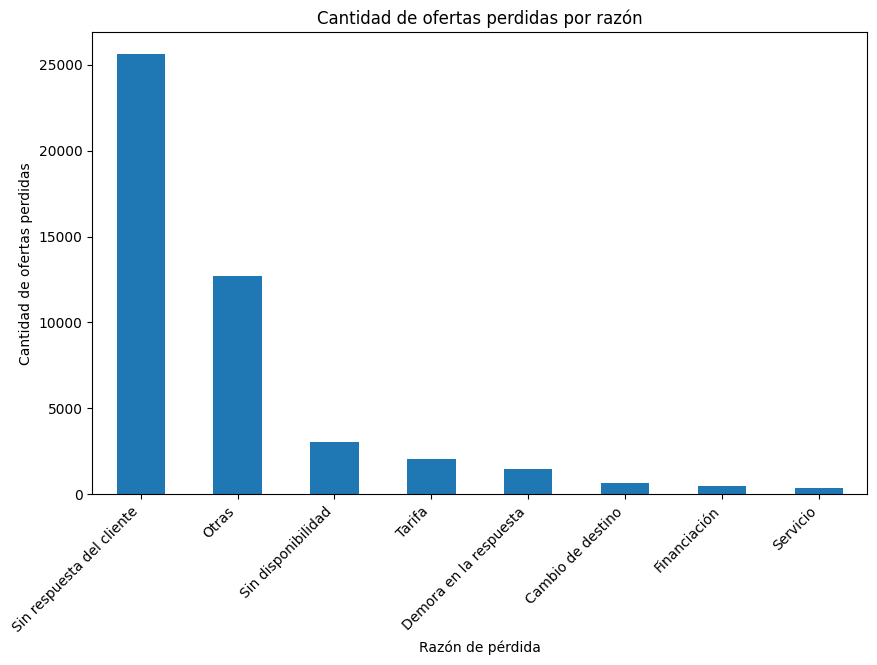

In [14]:
#1) ¿Cuál es la razón más común de pérdida de ofertas?
#Hipótesis: Algunas razones de pérdida serán más frecuentes que otras.

razones_perdida = df_copia[df_copia['estado'] == 'Perdido'].groupby('razon_de_perdida').size().sort_values(ascending=False)

razones_perdida.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de ofertas perdidas por razón')
plt.xlabel('Razón de pérdida')
plt.ylabel('Cantidad de ofertas perdidas')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
razones_perdida = df_copia[df_copia['estado'] == 'Perdido'].groupby('razon_de_perdida').size().sort_values(ascending=False)

# Mostrar los resultados
print("Cantidad de ofertas perdidas por razón:")
print(razones_perdida)

Cantidad de ofertas perdidas por razón:
razon_de_perdida
Sin respuesta del cliente    25582
Otras                        12721
Sin disponibilidad            3079
Tarifa                        2079
Demora en la respuesta        1455
Cambio de destino              674
Financiación                   519
Servicio                       358
dtype: int64


Para comprender mejor las razones detrás de la pérdida de ofertas, realizamos un análisis de las razones más comunes basado en los datos disponibles. Aquí están los hallazgos principales:

**Razón más común de pérdida:** La razón más común de pérdida de ofertas es "Sin respuesta del cliente", con un total de 25,582 casos. Esto sugiere que el cliente no da una respuesta a la propuesta presentada por el vendedor.

**Otras razones de pérdida:** Además de la falta de respuesta del cliente, otras razones comunes de pérdida incluyen "Sin disponibilidad" (3,079 casos), "Tarifa" (2,079 casos), "Demora en la respuesta" (1,455 casos), "Cambio de destino" (674 casos), "Financiación" (519 casos) y "Servicio" (358 casos).

**Recomendación:** Para abordar la falta de respuesta del cliente, se sugiere implementar un mejor seguimiento del prospecto para comprender las razones por las cuales no les interesa la propuesta. Esto podría incluir un análisis por etapas del proceso de venta para identificar en qué etapa se produce más frecuentemente la falta de respuesta.

**Próximos pasos:** Podemos profundizar en el análisis por etapas del proceso de venta y comparar la tasa de respuesta entre vendedores para identificar áreas de mejora y oportunidades de capacitación. Esto nos ayudará a entender mejor cómo mejorar la tasa de respuesta del cliente y, en última instancia, aumentar las ventas.

*MEDIOS DE VENTA*

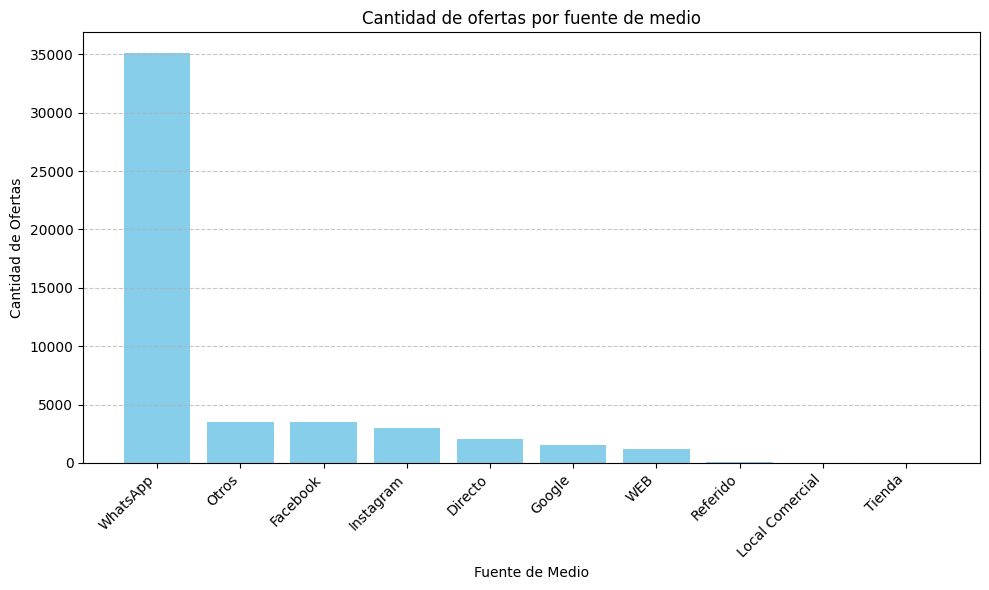

In [16]:
#2) ¿Cuál es la fuente de medio más utilizada para generar ofertas?
#Hipótesis: Algunas fuentes de medio serán más utilizadas que otras para generar ofertas.

ofertas_por_fuente = df_copia.groupby('fuente_medio').size().reset_index(name='cantidad')
ofertas_por_fuente = ofertas_por_fuente.sort_values(by='cantidad', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(ofertas_por_fuente['fuente_medio'], ofertas_por_fuente['cantidad'], color='skyblue')
plt.title('Cantidad de ofertas por fuente de medio')
plt.xlabel('Fuente de Medio')
plt.ylabel('Cantidad de Ofertas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


El análisis de las fuentes de medio revela que WhatsApp es la plataforma más utilizada para generar ofertas de viaje, seguida por Facebook e Instagram. Esto sugiere una oportunidad para potenciar estas redes sociales mediante campañas publicitarias específicas.

Para mejorar la generación de ofertas, se podría implementar estrategias para fortalecer la presencia en Facebook e Instagram, como campañas publicitarias dirigidas y la creación de contenido atractivo. Además, sería beneficioso optimizar la visibilidad y el atractivo de las ofertas en la web, mediante la mejora del sitio web y la implementación de promociones especiales.

En resumen, diversificar y fortalecer la presencia en diferentes canales de comunicación, como Facebook, Instagram y la web, con estrategias específicas y personalizadas, podría ayudar a la agencia de viajes a aumentar la generación de ofertas y, en última instancia, las ventas.

*DISTRUBIBUCIÓN DE LOS PRECIOS*

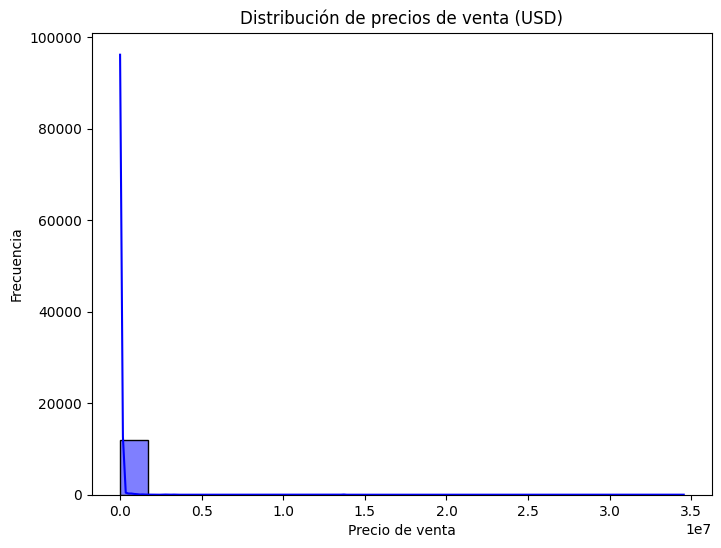

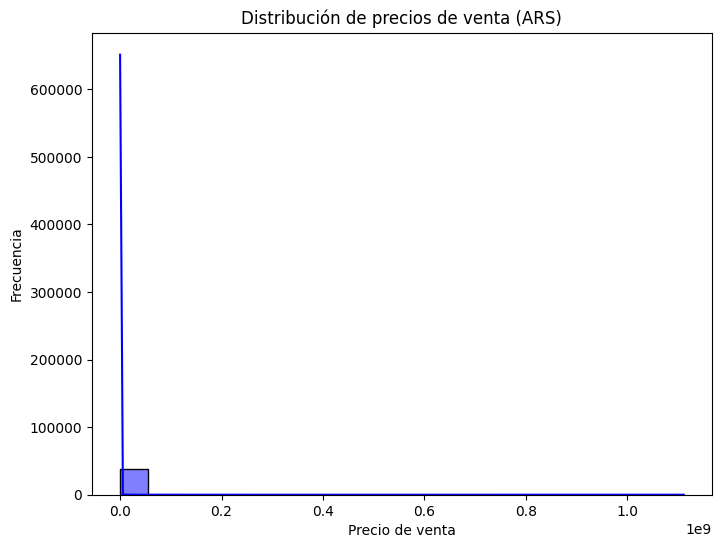

In [17]:
def distribucion_precios(df, moneda):
    df_moneda = df[df['moneda'] == moneda]

    plt.figure(figsize=(8, 6))
    sns.histplot(df_moneda['precio_de_venta'], bins=20, kde=True, color='blue')
    plt.title(f'Distribución de precios de venta ({moneda})')
    plt.xlabel('Precio de venta')
    plt.ylabel('Frecuencia')
    plt.show()


distribucion_precios(df_copia, 'USD')
distribucion_precios(df_copia, 'ARS')

In [18]:
def obtener_distribucion_precios(data, moneda):
    df_moneda = data[data['moneda'] == moneda]
    descripcion = df_moneda['precio_de_venta'].describe()
    return descripcion

distribucion_usd = obtener_distribucion_precios(df_copia, 'USD')
print("Distribución de precios de venta en USD:")
print(distribucion_usd)

distribucion_ars = obtener_distribucion_precios(df_copia, 'ARS')
print("\nDistribución de precios de venta en ARS:")
print(distribucion_ars)

Distribución de precios de venta en USD:
count    1.200900e+04
mean     2.912706e+04
std      5.515857e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.528120e+03
max      3.453509e+07
Name: precio_de_venta, dtype: float64

Distribución de precios de venta en ARS:
count    3.793300e+04
mean     1.982406e+05
std      1.052641e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.111111e+09
Name: precio_de_venta, dtype: float64


Analisis:

**Distribución de precios de venta en USD:**

- count: 12,014 ofertas tienen precios de venta en USD.

- mean: El precio promedio de venta es de aproximadamente $29,114.94.

- std: La desviación estándar de los precios de venta es de aproximadamente $551,471.30, lo que indica la dispersión de los datos alrededor de la media.

- min: El precio mínimo de venta es $0.

- 25%: El 25% de las ofertas tienen un precio de venta igual a $0.

- 50%: La mediana del precio de venta (50th percentile) es $0.

- 75%: El 75% de las ofertas tienen un precio de venta inferior a $1,524.78.

- max: El precio máximo de venta es de $34,535,090.

**Distribución de precios de venta en ARS:**

- count: 37,940 ofertas tienen precios de venta en ARS.

- mean: El precio promedio de venta es de aproximadamente $198,204.

- std: La desviación estándar de los precios de venta es de aproximadamente $10,
525,440.00, lo que indica la dispersión de los datos alrededor de la media.

- min: El precio mínimo de venta es $0.

- 25%: El 25% de las ofertas tienen un precio de venta igual a $0.

- 50%: La mediana del precio de venta (50th percentile) es $0.

- 75%: El 75% de las ofertas tienen un precio de venta inferior a $0.

- max: El precio máximo de venta es de $1,111,111,000.

**Interpretación:**

- La mayoría de las ofertas tienen un precio de venta igual a cero en ambas monedas.

- Los precios de venta en USD tienen una mayor variabilidad, con una desviación estándar más alta que los precios en ARS.

- Hay valores atípicos en ambas distribuciones, especialmente en ARS, donde el precio máximo es muy alto en comparación con la media y la mediana. Esto puede indicar la presencia de valores atípicos o errores en los datos.





**DESTINOS MAS FRECUENTADOS**

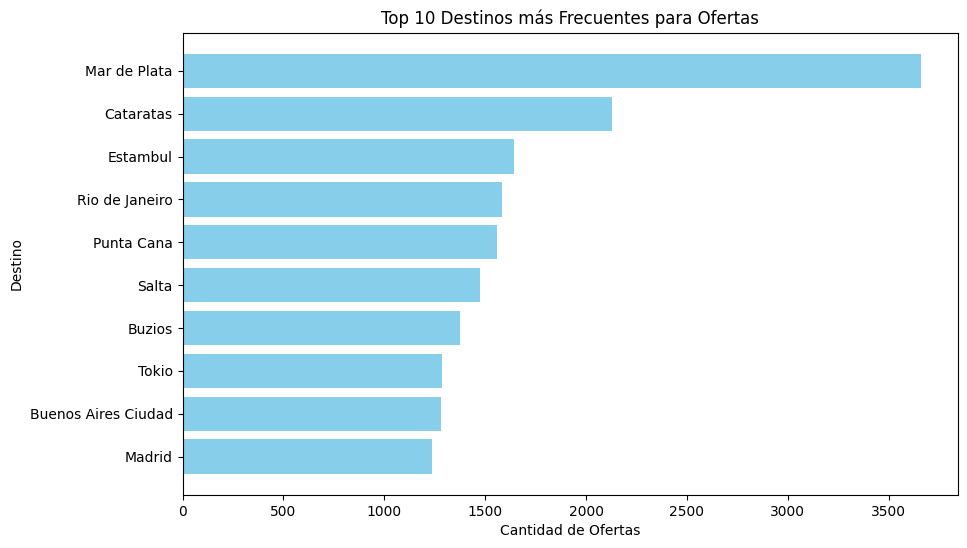

In [19]:
#4) ¿Cuál es el destino más frecuente para las ofertas?
#Hipótesis: Algunos destinos serán más populares que otros entre los clientes.

ofertas_por_destino = df_copia['destino'].value_counts().reset_index()
ofertas_por_destino.columns = ['Destino', 'Cantidad']
ofertas_por_destino = ofertas_por_destino.sort_values(by='Cantidad', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(ofertas_por_destino['Destino'], ofertas_por_destino['Cantidad'], color='skyblue')
plt.xlabel('Cantidad de Ofertas')
plt.ylabel('Destino')
plt.title('Top 10 Destinos más Frecuentes para Ofertas')
plt.gca().invert_yaxis()
plt.show()

In [21]:
var_name = df_copia.columns

print("Nombres de las variables:")
for i, name in enumerate(var_name, 1):
    print(f"{i}. {name}")

Nombres de las variables:
1. id
2. destino
3. estado
4. costo
5. impuesto
6. precio_de_venta
7. moneda
8. vendedor
9. cliente
10. estado_pago
11. fuente_medio
12. razon_de_perdida
13. fecha_de_salida
14. fecha_regreso
15. fecha_de_confirmacion
16. fecha_de_cancelacion
17. fecha_de_creacion


En resumen, estos destinos son populares entre los clientes debido a sus atractivos naturales, culturales y turísticos, lo que los convierte en opciones recurrentes para las ofertas de viajes.

*EVOLUCIÓN DE LOS DESTINOS*

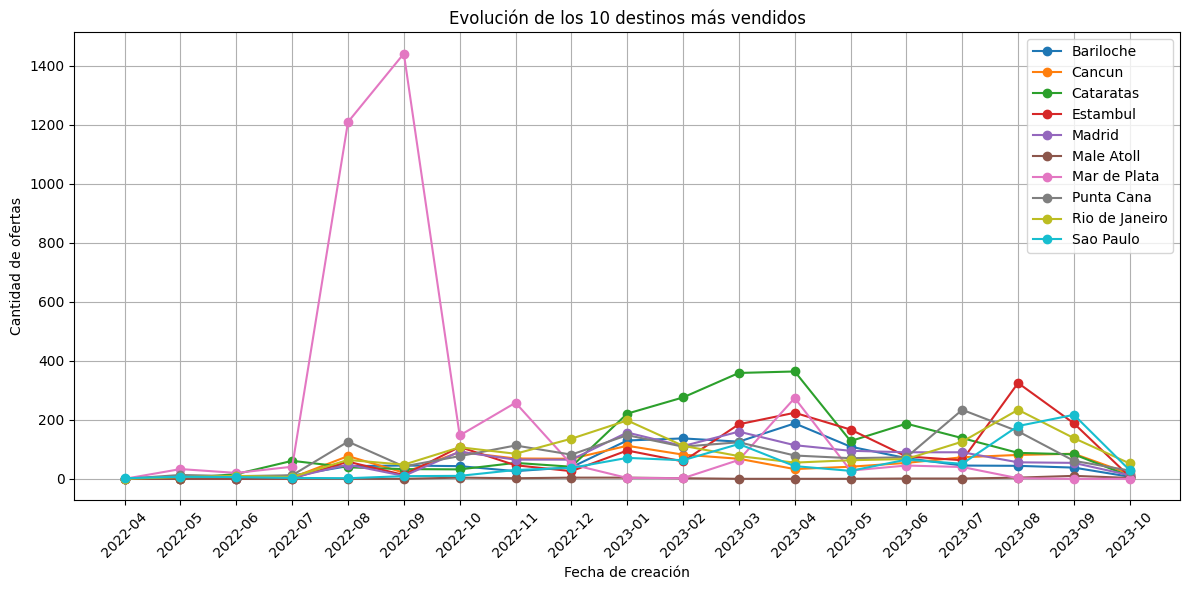

In [38]:
#5) ¿Cuál es la evolución de los destinos más frecuentes a lo largo del tiempo?
#Hipótesis: Algunos destinos pueden ser más populares en ciertas temporadas o meses del año debido a factores como el clima, festividades o eventos especiales.

top_destinos = df_copia.groupby('destino')['precio_de_venta'].sum().nlargest(10).index
data_top_destinos = df_copia[df_copia['destino'].isin(top_destinos)]
destinos_por_fecha = data_top_destinos.groupby([data_top_destinos['destino'], data_top_destinos['fecha_de_creacion'].dt.to_period('M')])['id'].count().reset_index()
destinos_por_fecha_pivot = destinos_por_fecha.pivot(index='fecha_de_creacion', columns='destino', values='id').fillna(0)
plt.figure(figsize=(12, 6))
for destino in destinos_por_fecha_pivot.columns:
    plt.plot(destinos_por_fecha_pivot.index.astype(str), destinos_por_fecha_pivot[destino], marker='o', label=destino)

plt.title('Evolución de los 10 destinos más vendidos')
plt.xlabel('Fecha de creación')
plt.ylabel('Cantidad de ofertas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Al utilizar un gráfico de líneas, podemos ver fácilmente cómo varía la cantidad de ofertas para cada destino mes a mes. Cada línea representa un destino y cómo la cantidad de ofertas para ese destino ha cambiado con el tiempo. Esto nos permite identificar patrones, picos y tendencias en la popularidad de los destinos a lo largo del año.

Este análisis muestra la evolución de los 10 destinos más ofertados por mes a lo largo del tiempo. Algunos destinos muestran una tendencia creciente, como Viña del Mar, Walt Disney World y Barcelona, mientras que otros muestran fluctuaciones en su popularidad a lo largo de los meses. Esto puede deberse a diversos factores como temporadas turísticas, eventos especiales o cambios en la demanda de los clientes.

Es importante monitorear estas tendencias para ajustar estrategias de marketing y ventas, así como para tomar decisiones informadas sobre la gestión de la oferta y la planificación de recursos en función de la demanda de los destinos.

In [26]:
var_name = df_copia.columns

print("Nombres de las variables:")
for i, name in enumerate(var_name, 1):
    print(f"{i}. {name}")

Nombres de las variables:
1. id
2. destino
3. estado
4. costo
5. impuesto
6. precio_de_venta
7. moneda
8. vendedor
9. cliente
10. estado_pago
11. fuente_medio
12. razon_de_perdida
13. fecha_de_salida
14. fecha_regreso
15. fecha_de_confirmacion
16. fecha_de_cancelacion
17. fecha_de_creacion


*VENDEDOR QUE REALIZA MAS CONSUSTAS, VENTAS, OPORTUNIDADES PERDIDAS*

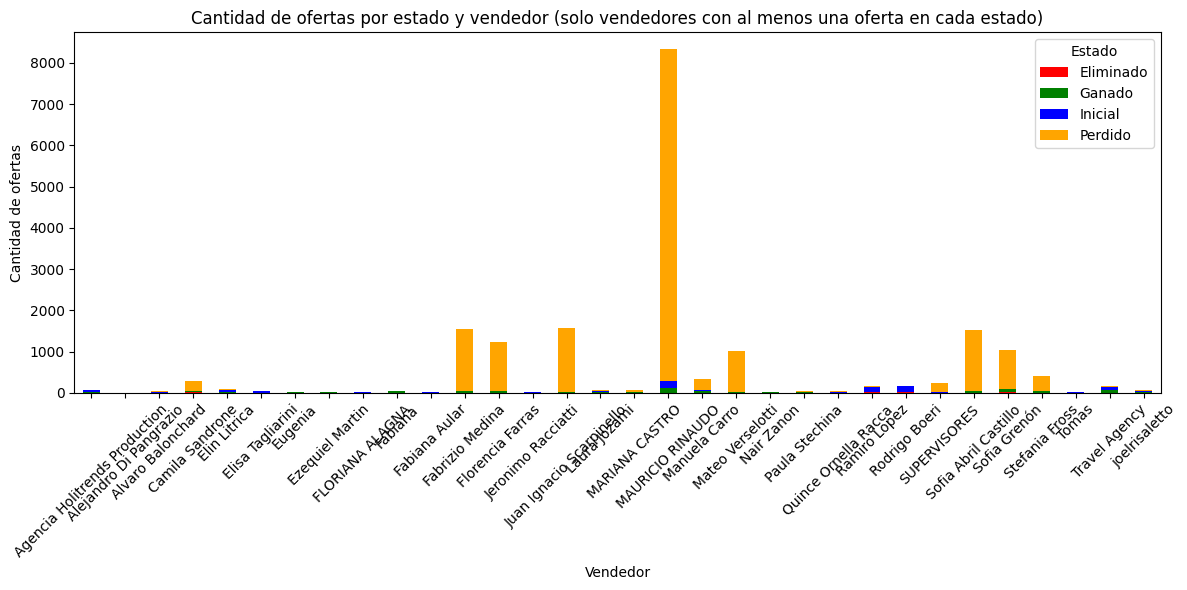

In [42]:
#6) ¿Qué vendedor realiza más consultas, concreta más ventas y pierde más oportunidades?
#Hipótesis: Algunos vendedores serán más efectivos en cada etapa del proceso de venta que otros.

# Filtrar vendedores con al menos una oferta ganada, una oferta perdida y una oferta inicial
vendedores_filtrados = vendedores[(vendedores['Inicial'] > 0) & (vendedores['Ganado'] > 0) & (vendedores['Perdido'] > 0)]

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Configurar colores para cada estado
colors = {'Inicial': 'blue', 'Ganado': 'green', 'Perdido': 'orange', 'Eliminado': 'red'}

# Graficar barras apiladas con colores personalizados
vendedores_filtrados.plot(kind='bar', stacked=True, color=[colors[column] for column in vendedores_filtrados.columns], ax=plt.gca())

# Etiquetas y título
plt.xlabel('Vendedor')
plt.ylabel('Cantidad de ofertas')
plt.title('Cantidad de ofertas por estado y vendedor (solo vendedores con al menos una oferta en cada estado)')
plt.xticks(rotation=45)
plt.legend(title='Estado')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


El análisis de los datos muestra una clara tendencia en la relación entre la cantidad de ofertas generadas por un vendedor y el número de ventas concretadas, así como el número de oportunidades perdidas. Los vendedores que generan más ofertas tienden a tener tanto más ventas exitosas como más oportunidades perdidas.

Este patrón sugiere que existe una oportunidad para mejorar la gestión de las oportunidades de venta, asegurando una asignación más efectiva de las mismas a los vendedores. Implementar un sistema de asignación que considere la carga de trabajo de cada vendedor y su historial de ventas podría ser una solución viable. Además, proporcionar capacitación y recursos adicionales para mejorar las habilidades de venta podría aumentar la tasa de conversión y reducir las oportunidades perdidas.

En resumen, una gestión más eficiente de las oportunidades de venta, combinada con el desarrollo profesional continuo de los vendedores, podría conducir a mejores resultados en las ventas y una mayor satisfacción del cliente.

*VENDEDOR QUE GENERA MAS INGRESOS*

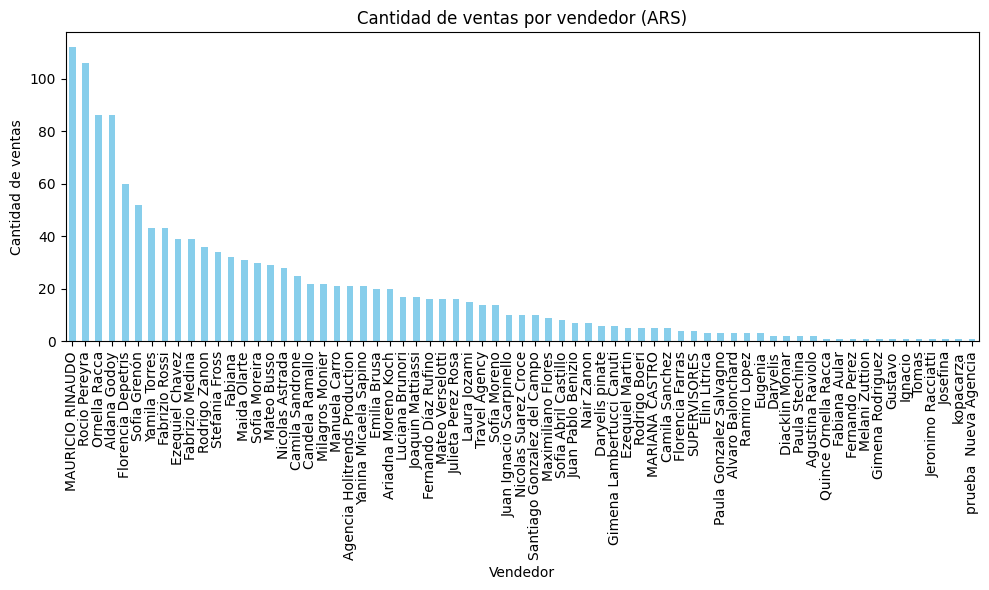

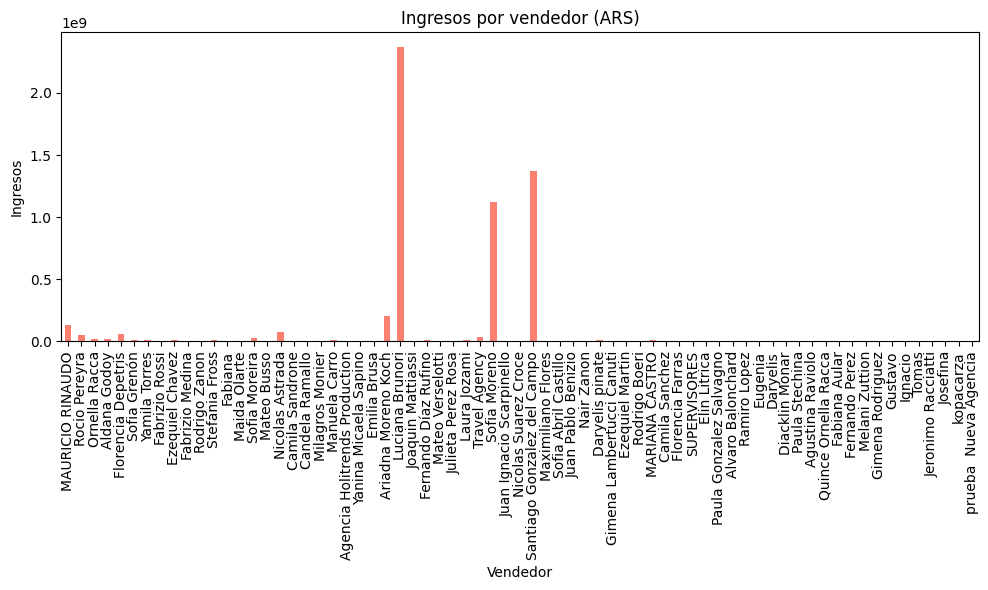

In [65]:
#7) ¿Qué vendedor genera más ingresos por ventas?
#Hipótesis: La cantidad de ventas no siempre esta relacionado a la cantidad de ingresos generados.

# Filtrar las ofertas ganadas en ARS
ofertas_ganadas_ars = df_copia[(df_copia['estado'] == 'Ganado') & (df_copia['moneda'] == 'ARS')]

cantidad_ventas_ars = ofertas_ganadas_ars.groupby('vendedor')['estado'].count()
ingresos_ars = ofertas_ganadas_ars.groupby('vendedor')['precio_de_venta'].sum()
cantidad_ventas_ars_sorted = cantidad_ventas_ars.sort_values(ascending=False)
ingresos_ars_sorted = ingresos_ars.loc[cantidad_ventas_ars_sorted.index]

plt.figure(figsize=(10, 6))
cantidad_ventas_ars_sorted.plot(kind='bar', color='skyblue')
plt.title('Cantidad de ventas por vendedor (ARS)')
plt.xlabel('Vendedor')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
ingresos_ars_sorted.plot(kind='bar', color='salmon')
plt.title('Ingresos por vendedor (ARS)')
plt.xlabel('Vendedor')
plt.ylabel('Ingresos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


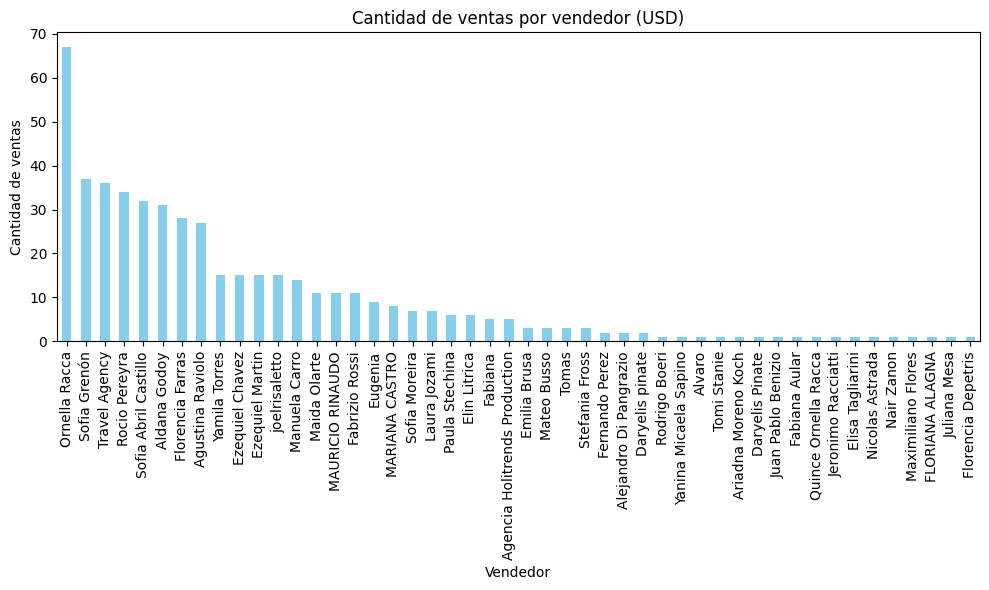

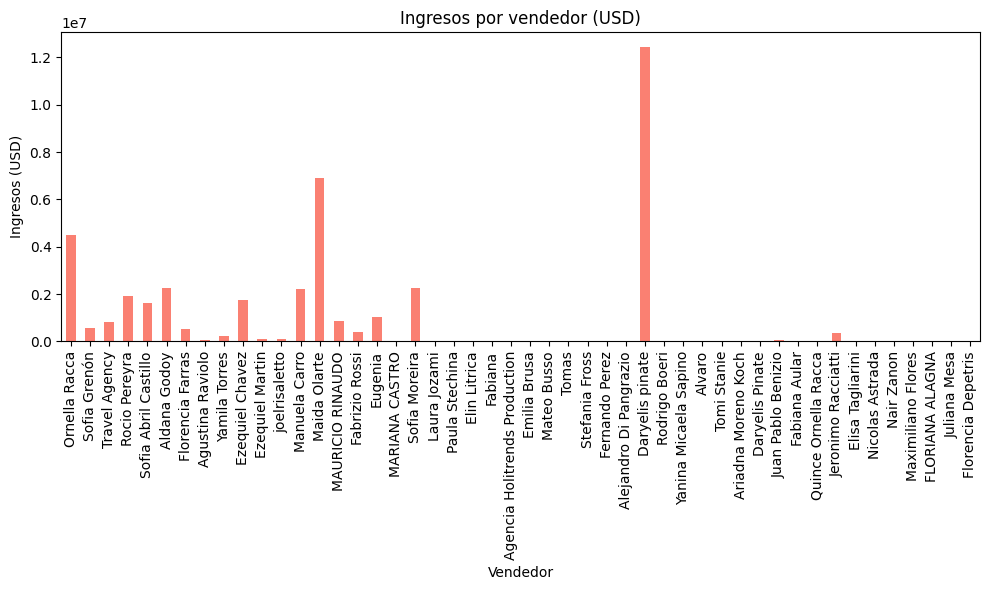

In [67]:
# Filtrar las ofertas ganadas en USD
ofertas_ganadas_usd = df_copia[(df_copia['estado'] == 'Ganado') & (df_copia['moneda'] == 'USD')]
cantidad_ventas_usd = ofertas_ganadas_usd.groupby('vendedor')['estado'].count().sort_values(ascending=False)
ingresos_usd = ofertas_ganadas_usd.groupby('vendedor')['precio_de_venta'].sum().loc[cantidad_ventas_usd.index]

plt.figure(figsize=(10, 6))
cantidad_ventas_usd.plot(kind='bar', color='skyblue')
plt.title('Cantidad de ventas por vendedor (USD)')
plt.xlabel('Vendedor')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
ingresos_usd.plot(kind='bar', color='salmon')
plt.title('Ingresos por vendedor (USD)')
plt.xlabel('Vendedor')
plt.ylabel('Ingresos (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [68]:
top_vendedores_ars = pd.DataFrame({
    'Cantidad de ventas (ARS)': cantidad_ventas_ars_sorted.head(10),
    'Ingresos (ARS)': ingresos_ars_sorted.head(10)
})

print("Top 10 vendedores con más ventas e ingresos en ARS:")
print(top_vendedores_ars)

top_vendedores_usd = pd.DataFrame({
    'Cantidad de ventas (USD)': cantidad_ventas_usd_sorted.head(10),
    'Ingresos (USD)': ingresos_usd_sorted.head(10)
})

print("Top 10 vendedores con más ventas e ingresos en USD:")
print(top_vendedores_usd)


Top 10 vendedores con más ventas e ingresos en ARS:
                    Cantidad de ventas (ARS)  Ingresos (ARS)
vendedor                                                    
MAURICIO RINAUDO                         112    1.295202e+08
Rocio Pereyra                            106    4.913602e+07
Ornella Racca                             86    1.658807e+07
Aldana Godoy                              86    1.823921e+07
Florencia Depetris                        60    5.524901e+07
Sofia Grenón                              52    1.170237e+07
Yamila Torres                             43    8.630455e+06
Fabrizio Rossi                            43    6.097091e+06
Ezequiel Chavez                           39    1.376701e+07
Fabrizio Medina                           39    3.822180e+05
Top 10 vendedores con más ventas e ingresos en USD:
                      Cantidad de ventas (USD)  Ingresos (USD)
vendedor                                                      
Ornella Racca                         


Basándonos en los datos proporcionados, podemos concluir que la cantidad de ventas no siempre está relacionada con la cantidad de ingresos generados.

Analizando los 10 vendedores con más ventas e ingresos en ARS y USD, vemos que algunos vendedores tienen una cantidad significativamente mayor de ventas pero generan menos ingresos en comparación con otros vendedores que tienen menos ventas pero generan más ingresos.

Por ejemplo, en ARS, Mauricio Rinaudo lidera la lista con la mayor cantidad de ventas y los mayores ingresos, lo que sugiere una alta eficiencia en la conversión de ventas en ingresos. Sin embargo, vendedores como Aldana Godoy y Rocio Pereyra tienen una cantidad similar de ventas pero con ingresos mucho menores.

En USD, vemos una situación similar. Ornella Racca encabeza la lista en términos de ingresos, a pesar de tener menos ventas en comparación con otros vendedores como Aldana Godoy y Rocio Pereyra.

Esto sugiere que algunos vendedores pueden tener una estrategia más efectiva para vender destinos con costos más elevados o tienen una habilidad para cerrar acuerdos más rentables, lo que respalda nuestra hipótesis de que la cantidad de ventas no siempre está relacionada con la cantidad de ingresos generados.

En resumen, la eficacia en la generación de ingresos puede variar entre los vendedores, y la cantidad de ventas no es necesariamente un indicador directo del éxito en términos de ingresos generados.

